# Propagation in a standard atmosphere


In [5]:
import os
os.chdir('../../../')
from rwp.environment import *
from rwp.sspade import *
from rwp.vis import *

Preparing environment

In [6]:
environment = Troposphere()
environment.ground_material = WetGround()
environment.z_max = 300
max_range = 150e3

Preparing transmitting antenna

In [7]:
antenna = GaussAntenna(wavelength=0.1, height=30, beam_width=2, eval_angle=0, polarz='H')

Calculating the electromagnetic field

In [8]:
propagator = TroposphericRadioWaveSSPadePropagator(antenna=antenna, env=environment, max_range_m=max_range)
field = propagator.calculate()

Visualising results

In [13]:
vis = FieldVisualiser(field, trans_func=lambda v: 10 * cm.log10(1e-16 + abs(v)), label='Pade + Transparent BC', x_mult=1E-3)

Amplitude of the field along axis x at the height z = 30 m

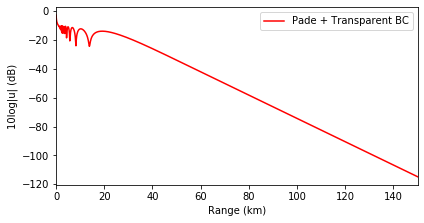

In [14]:
plt = vis.plot_hor(30)
plt.xlabel('Range (km)')
plt.ylabel('10log|u| (dB)')
plt.tight_layout()
plt.show()

Two dimensional distribution of the field amplitude

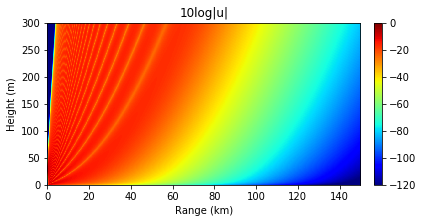

In [15]:
plt = vis.plot2d(min=-120, max=0)
plt.title('10log|u|')
plt.xlabel('Range (km)')
plt.ylabel('Height (m)')
plt.tight_layout()
plt.show()